### Objective

The purpose of this notebook is to evaluate the data quality of two datasets: one corresponding to BTC (Bitcoin) and the other to the S&P 500. To ensure accuracy and reliability for subsequent analyses, the following aspects will be assessed:

- Presence of null or missing values.
- Duplicate records within each dataset.
- Range, consistency, and descriptive statistics of the variables.
- Temporal integrity of the records.

This step is crucial to guarantee that the datasets are clean and suitable for comparative analysis.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
btc_data = pd.read_csv('./Data/btc_data_aligned_with_sp500.csv', encoding='cp1252')
sp500_data = pd.read_csv('./Data/sp500_data_aligned_with_btc_data.csv', encoding='cp1252')

In [12]:
btc_data['Date'] = pd.to_datetime(btc_data['Date'])
sp500_data['Date'] = pd.to_datetime(sp500_data['Date'])

#### Quick review to both datasets in a plot graph

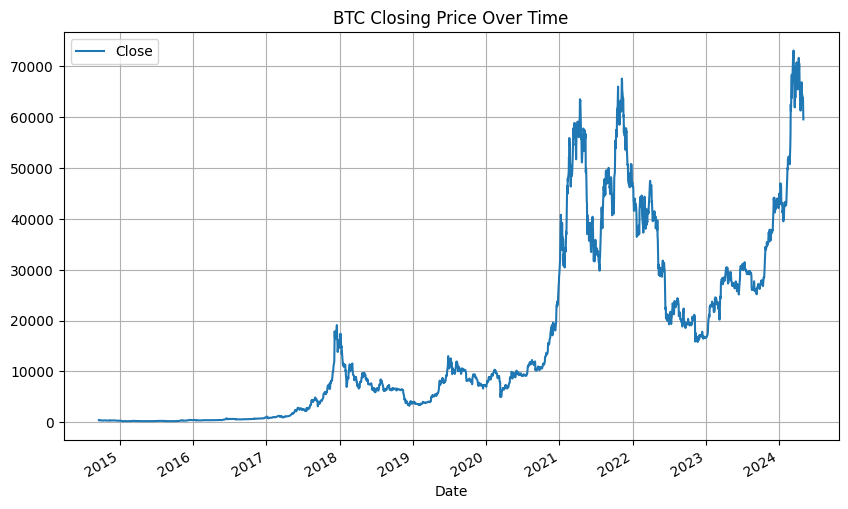

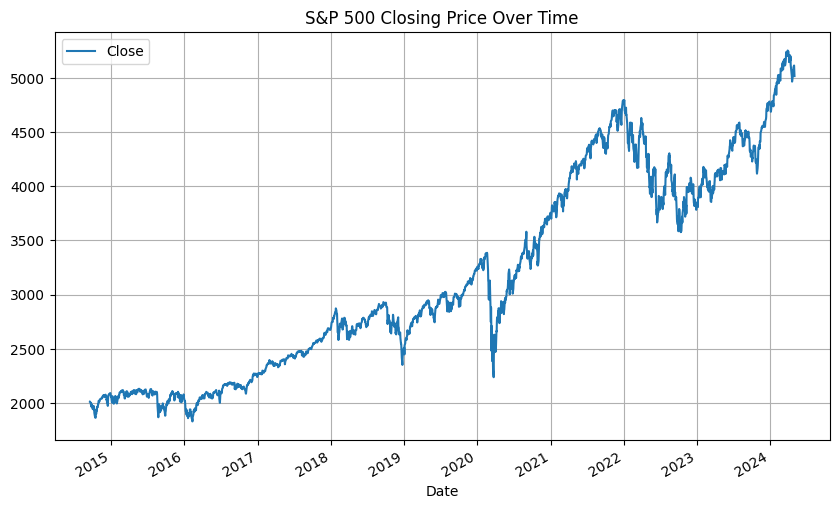

In [13]:
# BTC Closing Price
btc_data.plot(x='Date', y='Close', title='BTC Closing Price Over Time', figsize=(10, 6), grid=True)
plt.show()

# S&P 500 Closing Price
sp500_data.plot(x='Date', y='Close', title='S&P 500 Closing Price Over Time', figsize=(10, 6), grid=True)
plt.show()

#### Looking for Null, missing or duplicated values

In [14]:
print(f"BTC Null Values: {btc_data.isnull().sum().to_dict()}")
print(f"S&P 500 Null Values: {sp500_data.isnull().sum().to_dict()}")
print(f"BTC Duplicates: {btc_data.duplicated().sum()}")
print(f"S&P 500 Duplicates: {sp500_data.duplicated().sum()}")

BTC Null Values: {'Date': 0, 'Open': 0, 'High': 0, 'Low': 0, 'Close': 0, 'Adj Close': 0, 'Volume': 0}
S&P 500 Null Values: {'Date': 0, 'Open': 0, 'High': 0, 'Low': 0, 'Close': 0, 'Volume': 0}
BTC Duplicates: 0
S&P 500 Duplicates: 0


#### Checking Ranges and Consistency of the values

In [15]:
btc_data.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,2420,2420.000000,2420.000000,2420.000000,2420.000000,2420.000000,2.420000e+03
mean,2019-07-09 02:14:28.760330752,16025.704048,16435.798946,15581.727054,16039.567219,16039.567219,1.839613e+10
min,2014-09-18 00:00:00,176.897003,215.240997,171.509995,178.102997,178.102997,7.845880e+06
25%,2017-02-12 06:00:00,1026.510010,1046.707550,1008.504989,1029.292511,1029.292511,2.364240e+08
50%,2019-07-10 12:00:00,8705.449219,8875.632812,8424.935058,8712.442383,8712.442383,1.443086e+10
75%,2021-12-01 06:00:00,26887.815918,27335.662598,26415.205078,26877.522461,26877.522461,3.022172e+10
max,2024-05-01 00:00:00,73079.375000,73750.070313,71334.093750,73083.500000,73083.500000,3.509679e+11
std,NaN,17803.837508,18272.309272,17272.649419,17807.449450,17807.449450,2.053435e+10


In [16]:
sp500_data.describe()

,Date,Open,High,Low,Close,Volume
count,2420,2420.000000,2420.000000,2420.000000,2420.000000,2.420000e+03
mean,2019-07-09 02:14:28.760330752,3156.348093,3173.444873,3138.007967,3156.856128,4.006299e+09
min,2014-09-18 00:00:00,1833.400024,1847.000000,1810.099976,1829.079956,1.296530e+09
25%,2017-02-12 06:00:00,2308.957520,2317.192505,2295.190063,2307.132568,3.415900e+09
50%,2019-07-10 12:00:00,2896.905029,2906.540039,2880.200073,2889.294922,3.819815e+09
75%,2021-12-01 06:00:00,4040.439941,4070.400024,4002.970032,4034.367554,4.351965e+09
max,2024-05-01 00:00:00,5257.970215,5264.850098,5245.819824,5254.350098,9.976520e+09
std,NaN,933.324421,938.937843,927.794431,933.662005,9.599643e+08


#### Temporal Integrity: With this we can make sure both datasets have the same ranges for the dates

In [17]:
btc_gaps = btc_data['Date'].diff().dt.days.value_counts()
sp500_gaps = sp500_data['Date'].diff().dt.days.value_counts()

print(f"Gaps in btc_data: \n", btc_gaps)
print(f"Gaps in sp500_data: \n", sp500_gaps)

Gaps in btc_data: 
 Date
1.0    1895
3.0     434
4.0      68
2.0      22
Name: count, dtype: int64
Gaps in sp500_data: 
 Date
1.0    1895
3.0     434
4.0      68
2.0      22
Name: count, dtype: int64


### Observations

1. **Null Values**:
   - No null or missing values were found in either dataset.

2. **Duplicate Records**:
   - No duplicate records were detected in both datasets.

3. **Range Consistency**:
   - Descriptive statistics indicate values consistent with expectations for the analyzed metrics (e.g., opening and closing prices, and volumes).

4. **Temporal Integrity**:
   - Gaps in the dates were analyzed, and the intervals between records align perfectly for both datasets, ensuring temporal synchronization.

### Confidence in Subsequent Analysis
The quality validation performed in this notebook ensures that the datasets are clean, consistent, and reliable. This builds a strong foundation for the subsequent comparative analysis between BTC and S&P 500, reducing the likelihood of errors or biases caused by data issues. As a result, the insights drawn from future steps will be more accurate and trustworthy.